## Imports


In [17]:
import os
import os.path as osp
import random
import sys

import cv2
# from tensorflow import keras
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
import torchvision.transforms as tt
from PIL import Image, ImageFile

# from sklearn.datasets import load_files

%matplotlib inline
ImageFile.LOAD_TRUNCATED_IMAGES = True


# Data


## Load data


In [18]:
# set data paths
bins_path = r"..\data\bins"
nonbins_path = r"..\data\non-bins"


In [19]:
# convert all images to the same file format
def convert_img_type(to_type, dir, name):
    for i, filename in enumerate(os.listdir(dir)):
        name = f"{name}{'{:03}'.format(i)}.{to_type}"
        if not filename.endswith(f".{to_type}"):
            old_file_path = osp.join(dir, filename)
            img = Image.open(old_file_path)
            rgb_img = img.convert("RGB")
            rgb_img.save(osp.join(dir, name))
            os.remove(old_file_path)
        else:
            os.rename(osp.join(dir, filename), osp.join(dir, name))


In [20]:
convert_img_type("png", bins_path, 'bin_')
convert_img_type("png", nonbins_path, 'nonbin_')


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: '..\\data\\bins\\img011.png' -> '..\\data\\bins\\bin_000.png001.png002.png003.png004.png005.png006.png007.png008.png009.png010.png011.png'

In [ ]:
# preview data
def data_preview(dir):
    print(f"{osp.basename(dir)} data preview:")
    plt.figure(figsize=(20, 20))

    for i in range(5):
        file = random.choice(os.listdir(dir))
        image_path = os.path.join(dir, file)
        img = mpimg.imread(image_path)
        ax = plt.subplot(1, 5, i + 1)
        ax.title.set_text(file)
        plt.imshow(img)


bins data preview:


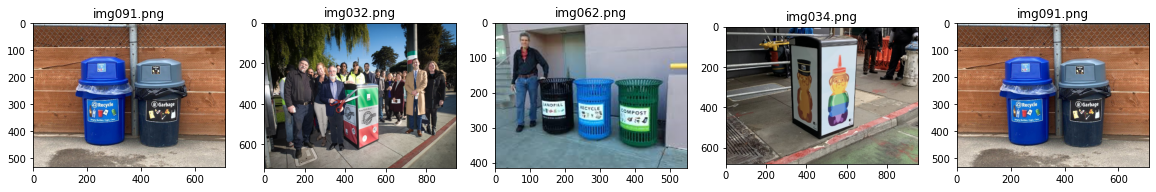

In [ ]:
data_preview(bins_path)


non-bins data preview:


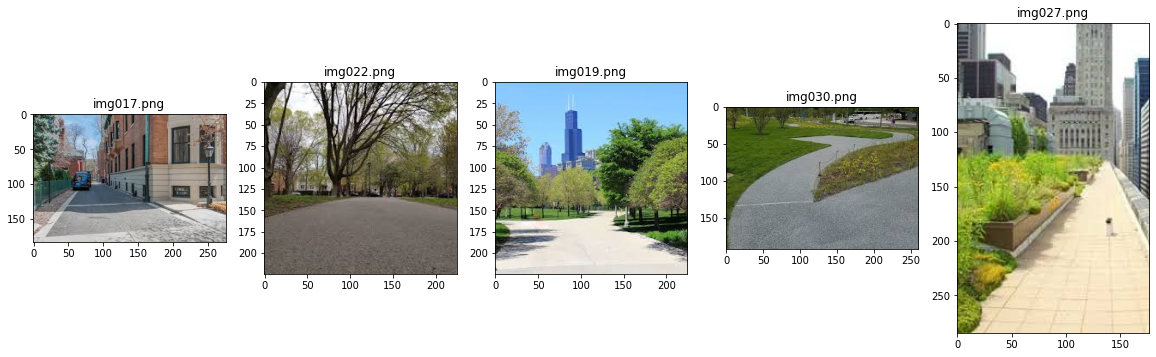

In [ ]:
data_preview(nonbins_path)


In [ ]:
# compute min image dimensions
def compute_dims(classes):
    dim = sys.maxsize
    for dir in classes:
        for file in os.listdir(dir):
            img = Image.open(osp.join(dir, file))
            dim = min(dim, min(img.size))

    return dim


dim = compute_dims([bins_path, nonbins_path])
print(f"Min image dimensionw: {dim}x{dim}")


Min image dimensionw: 158x158


In [ ]:
# resize images to min dimensions and center crop them 
for dir in [bins_path, nonbins_path]:
    for file in os.listdir(dir):
        img = Image.open(osp.join(dir, file))
        resize = tt.functional.resize(img, dim)
        crop = tt.functional.center_crop(resize, dim)
        crop.save(osp.join(dir, file))


# Model


## Build


## Train


## Evaluate Results
